# Breast Cancer Prognosis data notebook

## Required imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as spp

## Prepare the dataset

### Read the dataset

In [2]:
wpbc_dataframe = pd.read_csv(
    '../dataset/wpbc.csv', 
    delimiter=',',
    header=0
)

### Display the dataset

In [3]:
display(
    wpbc_dataframe.head(),
    wpbc_dataframe.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    198 non-null    int64  
 1   OUTCOME               198 non-null    object 
 2   TIME                  198 non-null    int64  
 3   RADIUS_1              198 non-null    float64
 4   TEXTURE_1             198 non-null    float64
 5   PERIMETER_1           198 non-null    float64
 6   AREA_1                198 non-null    float64
 7   SMOOTHNESS_1          198 non-null    float64
 8   COMPACTNESS_1         198 non-null    float64
 9   CONCAVITY_1           198 non-null    float64
 10  CONCAVE_POINTS_1      198 non-null    float64
 11  SYMMETRY_1            198 non-null    float64
 12  FRACTAL_DIMENSIONS_1  198 non-null    float64
 13  RADIUS_2              198 non-null    float64
 14  TEXTURE_2             198 non-null    float64
 15  PERIMETER_2           1

,ID,OUTCOME,TIME,RADIUS_1,TEXTURE_1,PERIMETER_1,AREA_1,SMOOTHNESS_1,COMPACTNESS_1,CONCAVITY_1,...,PERIMETER_3,AREA_3,SMOOTHNESS_3,COMPACTNESS_3,CONCAVITY_3,CONCAVE_POINTS_3,SYMMETRY_3,FRACTAL_DIMENSIONS_3,TUMOR_SIZE,LYMPH_NODE_STATUS
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


None

In [4]:
wpbc_dataframe = wpbc_dataframe.replace(
    to_replace='?',
    value=np.nan
)

### Separate ID's, Features, Outcomes

In [5]:
wpbc_ids = wpbc_dataframe.loc[:,'ID']
wpbc_outcomes = wpbc_dataframe.loc[:,'OUTCOME']
wpbc_features = wpbc_dataframe.iloc[:,2:]

display(
    wpbc_ids,
    wpbc_outcomes,
    wpbc_features
)

0      119513
1        8423
2      842517
3      843483
4      843584
        ...  
193    942640
194    943471
195     94547
196    947204
197    947489
Name: ID, Length: 198, dtype: int64

0      N
1      N
2      N
3      N
4      R
      ..
193    N
194    N
195    N
196    R
197    N
Name: OUTCOME, Length: 198, dtype: object

,TIME,RADIUS_1,TEXTURE_1,PERIMETER_1,AREA_1,SMOOTHNESS_1,COMPACTNESS_1,CONCAVITY_1,CONCAVE_POINTS_1,SYMMETRY_1,...,PERIMETER_3,AREA_3,SMOOTHNESS_3,COMPACTNESS_3,CONCAVITY_3,CONCAVE_POINTS_3,SYMMETRY_3,FRACTAL_DIMENSIONS_3,TUMOR_SIZE,LYMPH_NODE_STATUS
0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN


## Correlationl matrix

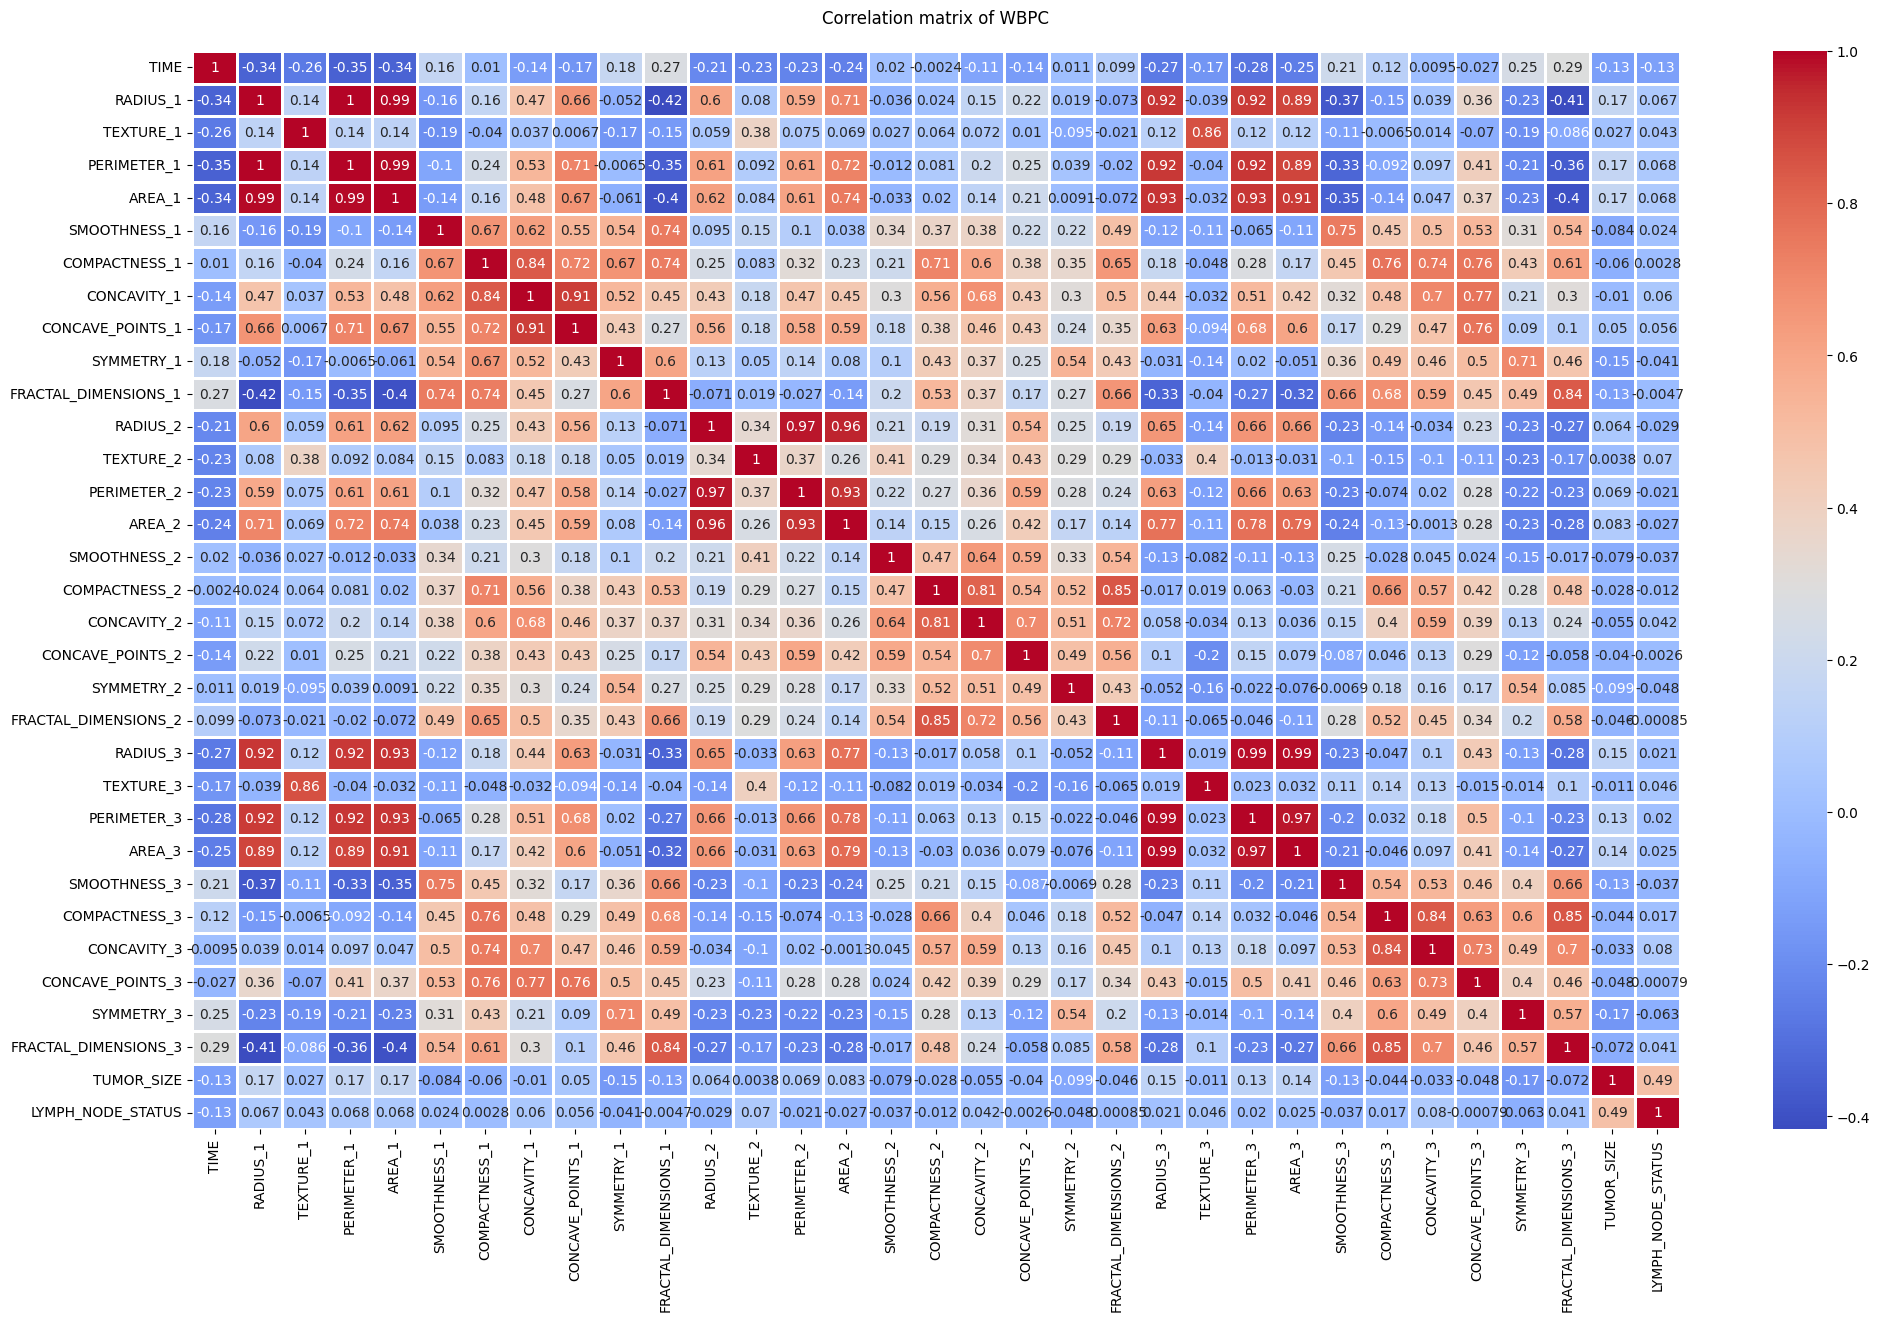

In [35]:
correlation_matrix = wpbc_features.corr()
plt.figure(figsize=(24,14))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=1, annot=True)
plt.title('Correlation matrix of WBPC', pad=20)
plt.show()